# **Les aventuriers des Axes Perdus**
# Epoch 5 : **AUTO-ENCODER !!!**

***Olivier Thöni*** *(novice en IA, et sinon... professeur de mathématiques)*

*School of AI - Le Mans*

Lien vers le présent NoteBook : https://frama.link/OT_dimension5      





# **1. Diminuer la dimensionnalité**

## **1.1.la régression linéaire**

https://frama.link/OT_dimensions 


## **1.2. L' "Analyse en Composantes Principales" (ACP)**

### **1.2.a/ la classification des iris**

https://frama.link/OT_dimension2  



### **1.2.b/ Les décathloniens**

https://www.kaggle.com/capedcrusader/pca-on-a-random-dataset/notebook (en R)


### **1.2.c/ Un usage d'une ACP simplifiée : la SVD pour la compression d'image**

https://frama.link/OT_dimension3 






## **1.3. "Réseau de Neurones Convolutionnel" (CNN)**

https://frama.link/OT_dimension4 


# **2. Récupérer l'information perdue : "AutoEncoder"**

Un **Auto-encoder** est un réseau de neurones **non supervisé** un peu particulier puisque **la couche d'entrée et la couche de sortie ont la même dimensionnalité !**

Mais entre temps... il aura fallu franchir un cataclysme, que l'on nomme le **goulot d'étranglement** (*Bottleneck*) ou **espace latent** (*latent space*) ! On diminue drastiquement la dimensionnalité pour la reconstruire ensuite...


![AutoEncoder](https://drive.google.com/uc?id=1BL49sq4bD5EWrLObrV_Y0kB4rfJ6S9TY)

On peut voir sur le principe, quelque similarité entre auto-encoder et l'ACP : on déconstruit une image, ou plus généralement une matrice, en se donnant les moyens de reconstruire une vue simplifiée de cette matrice. La différence principale réside dansle fait que les transformations liées à l'ACP sont linéaires, alors qu'elles ne le sont pas dans un auto-encoder, ce qui rend ce dernier plus performant puisque plus complexe.


Également appelée **probabilité des causes**, la **formule de Bayes**, ce bon vieux révérend Thomas (1702-1761), aide à comprendre le mécanisme... 

Prenons un exemple simpliste :



![Bayes](https://drive.google.com/uc?id=1t1S2DSFVmu00zKJ5R7lT9DM-51tfS_-a)

Voici deux petites couches de neurones, une d'entrée, une de sortie, avec leurs probabilités respectives... oups, pardon, leurs poids respectifs (ça commence pareil, ce sera plus pratique pour la suite...). 

Imaginons que l'on voie que le neurone B1 est activé, par une banale sigmoïde :
 (> 0.5 : eh vas-y que je t'active !), qu'est-ce qui a bien pu déclencher ça depuis la couche du dessus ?

**Principe mathématique sous-jacent :**

Cet "univers" parallèle, dans lequel B1 est activé, ne peut exister que si :

* A1 et A3 étaient activés, et ont activé B1 (évènement 1)

ou

* A1 et A2 étaient activés, et ont activé B1 (idem avec A1 et A4) (évènements 2 et 2 bis)

ou

* A1 et A3 et A4 étaient activés, et ont activé B1 (évènement 3)

ou 

* les cas précédents sont réalisés, avec en plus un des neurones non signalés (évènement 4)




La probabilité que nous soyons dans cet univers où B1 est sollicité est :

P(B1) = O.25 * 0.4 + 0.25 * 0.1 + 0.25 * 0.3 + 0.25 * 0.1, soit 0.225

Bayes nous dit alors que, sachant que B1 est activé, la probabilité que cela soit dû à l'évènement 1 est :

[P(A1 et A3)* P(B1 via A1) * P(B1 via A3)] / P(B1) soit : (0.25 * 0.25  * 0.4 * 0.3 ) / 0.225 soit 0.075/0.225 soit **1 chance sur 3**

Les événements 2 et 2 bis ont chacun une probabilité de (0.25 * 0.25 * 0.4 * 0.1) / 0.225 soit 0.025/0.225 (**1 chance sur 9**, pour chacun d'eux)

L'événement 3 vaut (0.25 * 0.25 * 0.25 * 0.4 * 0.3 * 0.1)/0.225 = 0.0075 / 0.225 (**1 trentième...**)

Autant dire qu'il ne reste pas grand'chose pour l'événement 4.

Voyez les cotes, faites vos jeux quant au responsable de l'activation de B1 !


Si vous voulez reconstituer l'information avant qu'elle soit dégradée par la diminution de la dimensionnalité, vous pouvez donc miser une petite pièce de 33 cts sur l'activation de A1 et A3, une petite pièce de 11 cts sur (AI et A2) ou (A1 et A4), et vous avez de bonnes chances de récupérer presque entièrement l'information que vous aviez à la couche supérieure...

Là, on a fait les calculs nous-mêmes, mais dans la partie "décodeur" de l'auto-encoder, les poids sont entraînés également par le modèle, comme dans tout réseau profond qui se respecte...

Et quand on en tient une couche, on peut les empiler pour reconstruire toute l'information qu'un réseau profond aura pu distiller !



![AutoEncoder](https://drive.google.com/uc?id=1tLzLLjheO3uxhWKr6kaHC_YtPnIuWosP)

Aujourd'hui, deux applications pratiques intéressantes des auto-encodeurs sont le débruitage des données (que nous présentons plus loin dans ce billet) et la réduction de la dimensionnalité pour la visualisation des données. Avec des contraintes de dimensionnalité et de rareté appropriées, les auto-codeurs peuvent apprendre des projections de données plus intéressantes que l'ACP ou d'autres techniques de base.

Tout d'abord, nous construirons 

* le modèle le plus simple d'auto-encoder,

* Auto-encoder Variationnel (VAE)

* un modèle plus profond

* ...et un autoencoder convolutionnel

Puis, nous verrons deux usages de l'auto-encoder :

* Auto-encoder pour la classification d'images

* Auto-encoder pour le débruitage (*denoising*) d'image

sources : 

* François CHOLLET (créateur de Keras) : https://blog.keras.io/building-autoencoders-in-keras.html 

* Traduit avec www.DeepL.com/Translator (version gratuite) 

##  **2.1. L'auto-encoder le plus simple : une seule couche dense pour l'encodage, une seule couche dense pour le décodage**

Pour construire un auto-encodeur, vous avez besoin de trois choses : une fonction d'encodage, une fonction de décodage et une fonction de distance entre la quantité d'informations perdues entre la représentation compressée de vos données et la représentation décompressée (c'est-à-dire une fonction de "perte"). L'encodeur et le décodeur seront choisis pour être des fonctions paramétriques (typiquement des réseaux de neurones), et pour être différenciables par rapport à la fonction de distance, afin que les paramètres des fonctions d'encodage/décodage puissent être optimisés pour minimiser la perte de reconstruction, en utilisant la descente stochastique de gradient. C'est simple (*sic, dixit* François Chollet...) ! 

"Et vous n'avez même pas besoin de comprendre ces mots pour commencer à utiliser les auto-codeurs en pratique"... Ah ben alors, allons-y...

C'est parti...



In [0]:
# compatibilité avec TensorFlow 1, dépécié :
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
non-resource variables are not supported in the long term





Using TensorFlow backend.


Créons également un modèle d'encodeur séparé :

In [0]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

... de même qu'un modèle de décodeur :

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

Maintenant, entraînons notre auto-encodeur à reconstruire les chiffres du MNIST.

Tout d'abord, nous allons configurer notre modèle pour utiliser une fonction de perte (*loss*) binaire de *crossentropy* par pixel, et l'optimiseur Adadelta (une nouvelle méthode de taux d'apprentissage par dimension pour la descente de gradient) :

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Préparons nos données d'entrée. Nous utilisons la base de données de chiffres manuscrit du MNIST (Mixed National Institute of Standards and Technology), elle regroupe 60000 images d'apprentissage et 10000 images de test, en noir et blanc, normalisées centrées de 28 pixels de côté.
Nous nous débarrassons des étiquettes (puisque nous ne sommes intéressés que par l'encodage/décodage des images d'entrée).

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Nous allons normaliser toutes les valeurs entre 0 et 1 et nous allons aplatir (*"flattening"*) les images 28x28 en vecteurs de taille 784.

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Maintenant, entraînons notre auto-encodeur sur 50 époques :

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 10s 168us/step - loss: 0.3567 - val_loss: 0.2698
Epoch 2/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2613 - val_loss: 0.2497
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2397 - val_loss: 0.2273
Epoch 4/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2196 - val_loss: 0.2096
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2049 - val_loss: 0.1974
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1943 - val_loss: 0.1884
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1863 - val_loss: 0.1813
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1798 - val_loss: 0.1753
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1741 - val_loss: 0.

Après 50 époques, l'auto-encodeur semble atteindre une valeur stable de perte relative entraînement/test d'environ 0,11 (avec un écart d'1,7% entre les deux). Nous pouvons essayer de visualiser les entrées reconstruites et les représentations codées. Nous utiliserons Matplotlib.

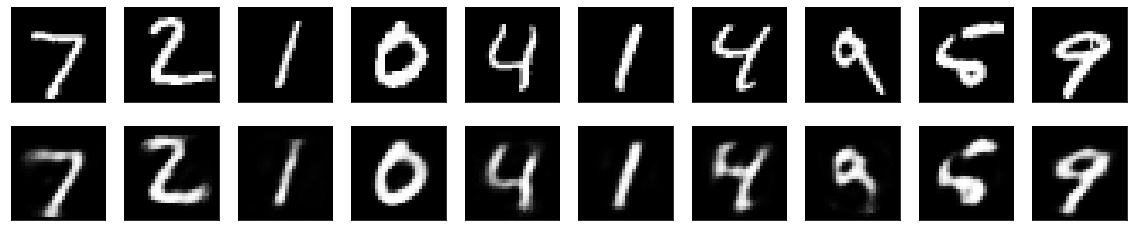

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Voici ce que nous obtenons. La ligne du haut correspond aux chiffres originaux, et la ligne du bas aux chiffres reconstruits. 

Correct, mais nous perdons beaucoup de détails avec cette approche de base.

Mettons un peu de profondeur !

## **2.2. Deep Autoencoder**

Creusons encore un peu la question... en profondeur...

Nous n'avons pas à nous limiter à une seule couche comme encodeur ou décodeur, nous pourrions plutôt utiliser une pile de couches, comme par exemple :

In [0]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Essayons ça :

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3425 - val_loss: 0.2630
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2551 - val_loss: 0.2456
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2409 - val_loss: 0.2347
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2246 - val_loss: 0.2148
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2100 - val_loss: 0.2048
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2010 - val_loss: 0.1957
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1901 - val_loss: 0.1847
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1799 - val_loss: 0.1754
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1733 - val_loss: 0.1683
Epoch

Après 50 époques, il atteint une perte entraînement/test de ~0,11 (avec un écart d'1,3% entre les deux, un peu mieux que notre premier modèle. 

Nos chiffres reconstruits ont également l'air un peu meilleurs...

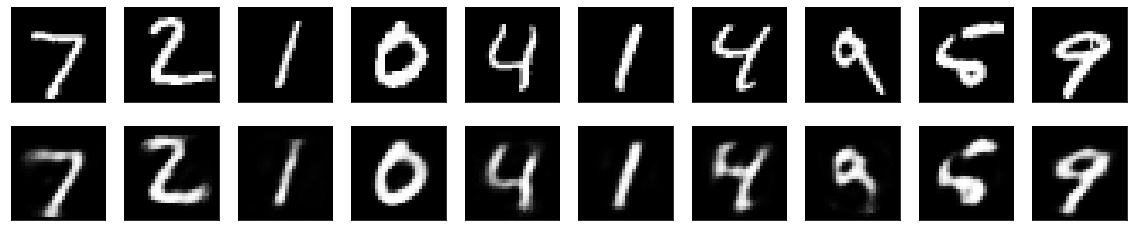

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **2.3. Auto-encoder Variationnel (VAE)**

source : https://www.kdnuggets.com/2018/11/variational-autoencoders-explained.html 

Dans cet exemple, nous allons nous pencher davantage sur l'***espace latent***, c'est-à-dire la zone où se situe le goulot d'étranglement.

**lien vers le document** : https://frama.link/OT_dimension5bis 

## **2.4. Auto-encoder convolutionnel**

Puisque nos entrées sont des images, il est logique d'utiliser les réseaux neuronaux convolutionnels (convnets) comme encodeurs et décodeurs. 

Dans la pratique, les auto-codeurs appliqués aux images sont toujours des auto-codeurs convolutionnels - ils sont tout simplement beaucoup plus performants.

Mettons-en un en œuvre. L'encodeur sera constitué d'une pile de couches Conv2D et MaxPooling2D tandis que le décodeur sera constitué d'une pile de couches Conv2D et UpSampling2D (sur-échantillonnage).

*Note : deux types courants de couches peuvent être utilisés dans le décodeur : une couche de suréchantillonnage (UpSampling2D) qui double simplement les dimensions de l'entrée et la couche de convolution transposée (Conv2DTranspose) qui effectue une opération de convolution inverse.*



In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Pour l'entraîner, nous utiliserons les chiffres originaux du MNIST avec la forme (échantillons, 3, 28, 28), et nous nous contenterons de normaliser les valeurs des pixels entre 0 et 1.

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

Entraînons ce modèle pour 50 époques. 

In [0]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.2156 - val_loss: 0.1731
Epoch 2/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.1546 - val_loss: 0.1403
Epoch 3/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.1380 - val_loss: 0.1294
Epoch 4/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.1294 - val_loss: 0.1283
Epoch 5/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1244 - val_loss: 0.1196
Epoch 6/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1206 - val_loss: 0.1184
Epoch 7/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1180 - val_loss: 0.1162
Epoch 8/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1157 - val_loss: 0.1121
Epoch 9/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1141 - val_loss: 0.

Le modèle converge vers une perte de 0,099 (avec un écart de la perte de validation oscillant, c'est assez curieux, autour de celle d'entraînement, dans une fourchette, après 50 époques, entre -3% et 1,5% ), ce qui est nettement mieux que nos modèles précédents (cela est dû en grande partie à la plus grande finesse de la convolution). Durée : 1h20 sur ma CPU, 4 min sur ma GPU...

Examinons les chiffres dans leur état initial :

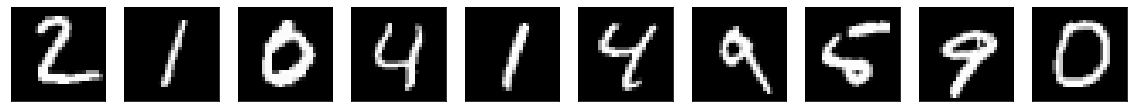

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Jetons également un coup d'oeil aux représentations codées en 32 dimensions, voilà ce qui reste de nos chiffres dans le ***bottleneck*** !

Ces représentations sont en 8x4, nous les redimensionnons donc en 1x32 afin de pouvoir les afficher sous forme d'images en niveaux de gris.

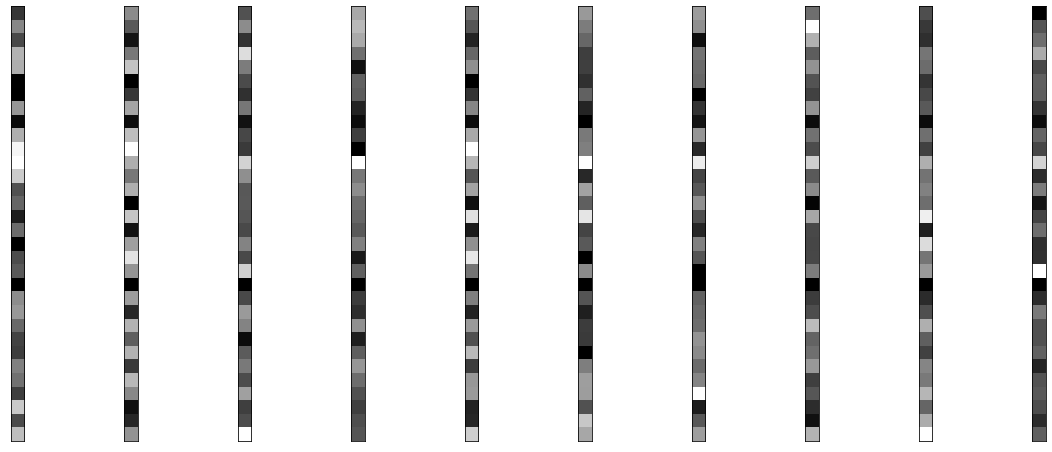

In [0]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(1, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Et voici, en rappel, les chiffres initiaux, et en-dessous, les chiffres reconstruits 

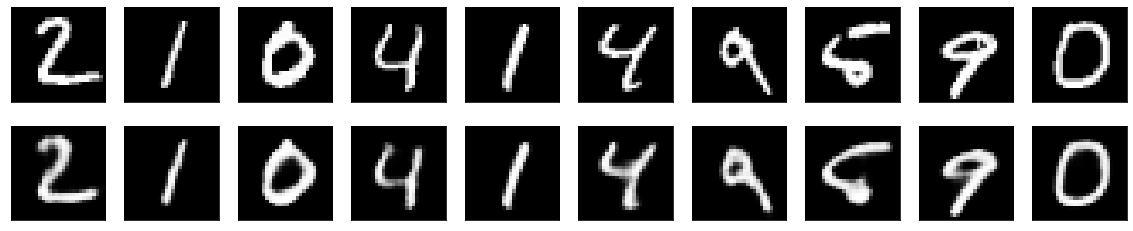

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Le résultat est nettement probant (voir le 7<sup> ème</sup> chiffre, un "9", qui posait problème jusqu'à présent...)

## **2.5. Application au débruitage d'image ("*denoising*")**

Nous allons faire travailler notre Auto-Encoder convolutionnel sur un problème de débruitage d'image.

C'est simple (là encore, *sic dixit* Lautent Chollet), nous allons l'entraîner à classer des images de chiffres bruitées pour nettoyer d'autres images.

Nous allons comme précédemment normaliser la matrice de l'image (ramener les valeurs initiales de gris entre 0 et 255 à des valeurs entre 0 et 1), puis générer un bruit synthétique ajouté aux chiffres, en lui ajoutant une matrice de bruit gaussien (loi normale centrée et réduite, qui augmente ou diminue le gris).

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Voici à quoi ressemblent nos chiffres bruités :

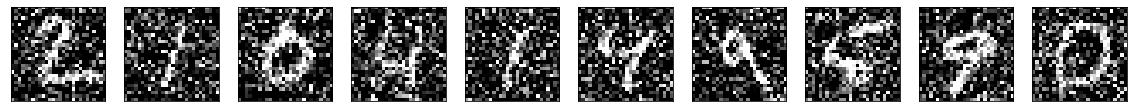

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En louchant, ou en clignant des yeux, ou sous l'emprise de quelques produits, nous pouvons vaguement les reconnaître...
Notre auto-encoder sera-t-il capable de retrouver les chiffres originaux ? Voyons...

Comparativement à notre précédent auto-encoder convolutionnel, afin d'éprouver la qualité de la reconstruction, nous allons légèrement renforcer notre modèle en ajoutant quelques filtres supplémentaires à chaque couche...

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Entraînons tout ça, sur 50 époques

In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.1842 - val_loss: 0.1265
Epoch 2/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.1187 - val_loss: 0.1107
Epoch 3/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.1109 - val_loss: 0.1076
Epoch 4/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.1069 - val_loss: 0.1084
Epoch 5/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.1049 - val_loss: 0.1033
Epoch 6/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.1036 - val_loss: 0.1025
Epoch 7/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.1024 - val_loss: 0.1014
Epoch 8/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.1017 - val_loss: 0.0997
Epoch 9/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.1008 - val_loss: 0.0

Une loss voisine de 0,095 (et un écart de 0,2% entre loss d'entraînement et de validation) !

Et voyons le résultat :

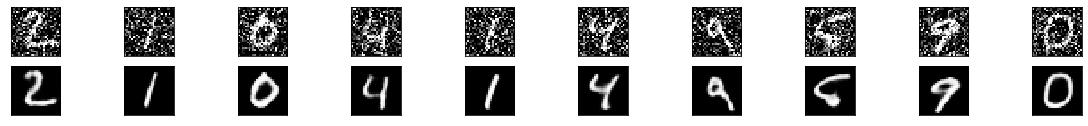

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    ax = plt.subplot(2, n, i +n )
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

GG !!!

**Et après ?**

Si vous adaptez le procédé à un ConvNet plus costaud, vous pouvez commencer à construire des documents débruités ou des modèles de *denoising* audio... Kagle possède un intéressant jeu de données pour démarrer... : https://www.kaggle.com/c/denoising-dirty-documents

## Et encore après ?

Qu'est-ce qu'on pourrait bien inventer d'encore plus ouf-guedin ?

**ça !**

![AutoEncoder+](https://drive.google.com/uc?id=1VY382CGYFxm_vBufblwhTyJQ139OLNPY)

ça s'appelle le "prolongement analytique" : dans des problèmes dits "mal définis" (exemple naïf : "Qu'est-ce qui fait 4 ?"), ici, des situations où la simulation expérimentale apporte des résultats de dimension insuffisante pour être comparés aux modèles théoriques, on fait appel à des réseaux pour lesquels la dimensionnalité de sortie est supérieure à celle d'entrée !

Dans l'article : https://actu.epfl.ch/news/le-machine-learning-pour-les-problemes-de-prolonge/ , 
le physicien, un étudiant en post-doc travaillant via la physique quantique à la création de nouveaux matériaux, a fait des simulations dans le temps que l'on connaît, mais le modèle utilise un temps complexe, si bien que la simulation peut s'interpréter d'une infinité de manières, toutes conformes avec le modèle théorique. Le réseau va sélectionner celles qui sont le plus adaptées.

Une fois entraîné, le réseau neuronal permet d’obtenir des réponses plus rapidement et de manière plus robuste que les méthodes traditionnelles.



### un peu de lecture complémentaire :

https://drive.google.com/viewerng/viewer?url=http://dm.snu.ac.kr/static/docs/TR/SNUDM-TR-2015-03.pdf 